In [165]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [166]:
data_X = pd.read_csv("IRISFeat.csv",header = None) .values
data_y = pd.read_csv("IRISlabel.csv",header = None).values
# Preview the first 5 lines of the loaded data 

In [167]:
def get_next_train_valid(X_shuffled, y_shuffled, k, itr = 0):
    """
    - itr value can tell you which fold you pick up for valid and rest go to training
    - use 1 fold for validation and all other folds for training
    - in next iteration, use a different fold for validation and remaining folds for training
        
    Basically, here you will determine which fold goes for validation and which ones for training
    """
    X_valid = X_shuffled[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k,:]
    Y_valid = y_shuffled[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k]
    X_train = np.delete(X_shuffled, np.s_[itr*len(X_shuffled)//k:(itr+1)*len(X_shuffled)//k:1], 0)
    Y_train = np.delete(y_shuffled, np.s_[itr*len(y_shuffled)//k:(itr+1)*len(y_shuffled)//k:1], 0)
    
    
    return  X_train, Y_train, X_valid, Y_valid

In [173]:
samples = np.concatenate((data_X, data_y), axis=1)

#print(Samples)
np.random.shuffle(samples)
    
    #X
X_shuffled = samples[:,:-1]
#y_shuffled = samples[:,-1]*2-1
y_shuffled = samples[:,-1]


X_train, Y_train, X_valid, Y_valid = get_next_train_valid(X_shuffled, y_shuffled, 5)

#print(X_train,Y_train)

X_train_pading = np.concatenate((X_train, np.ones((len(X_train),1))), axis=1)


#print(X_train_pading[1]) 

W_0 = np.ones(X_train_pading.shape[1])

Objective = np.array([])

s = 1

beta = 0.1


for i in range(10**3):
    
    aa = s
    
    summ = np.zeros(3)
    
    for m in range(len(X_train_pading)):
        
        summ = summ + (Y_train[m]*X_train_pading[m])- X_train_pading[m]/(1+np.exp(-W_0.T @ X_train_pading[m] ))
    
    f1 = -((1/len(X_train_pading))*summ);
    
    S = 0
    
    for m in range(len(X_train_pading)):
        S = S + np.log(1 + np.exp(-Y_train[m] * W_0.T @ X_train_pading[m]))
        
    #print(S)
    
    object_i = np.array([(1/len(X_train_pading))*S]);
    
    #print(object_i)
    #print(Objective)
    
    Objective = np.concatenate((Objective,object_i),axis=0)
    
    if (np.linalg.norm(f1)<0.0001):
        break
    elif i>10000:
        break
    else:
        #print(f1)
        W_0 = W_0 -aa * f1

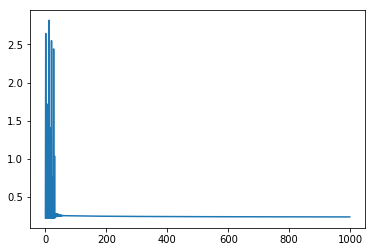

In [174]:
plt.plot(range(len(Objective)), Objective)

In [175]:
X_train_pading[m]


array([6.3, 3.3, 1. ])

In [176]:
W_0

array([ 5.80631386, -9.2133676 , -2.72901681])

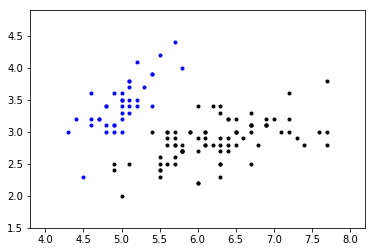

In [179]:
for i in range(len(X_train_pading)):
    if (Y_train[i] == 1):
        plt.plot(X_train_pading[i,0], X_train_pading[i,1] , '.k')
    else:
        plt.plot(X_train_pading[i,0], X_train_pading[i,1] , '.b')

x = np.arange(3.0, 9.0, 0.05)
y = (W_0[2]/W_0[0]*x)+(W_0[1]/W_0[0]);

plt.xlim(np.min(X_train_pading[:,0])-0.5, np.max(X_train_pading[:,0])+0.5) 
plt.ylim(np.min(X_train_pading[:,1])-0.5, np.max(X_train_pading[:,1])+0.5) 
plt.plot(x, y , '-')

In [ ]:
W_0

In [110]:
X_train_pading[m]

array([6.7, 3.3, 1. ])